In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
digits = load_digits()
data, target = digits.data, digits.target

In [3]:
data = data / 16.0

In [4]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [5]:
def relu(values):
    return np.maximum(0, values)

def softmax(values):
    exp_values = np.exp(values - np.max(values, axis=1, keepdims=True))
    return exp_values / np.sum(exp_values, axis=1, keepdims=True)

In [6]:
def initialize_parameters(input_size=64, hidden_size=20, output_size=10):
    input_to_hidden = {
        "weights": np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size),
        "biases": np.zeros((1, hidden_size)),
    }
    hidden_to_output = {
        "weights": np.random.randn(hidden_size, output_size) * np.sqrt(2 / hidden_size),
        "biases": np.zeros((1, output_size)),
    }
    return input_to_hidden, hidden_to_output

In [7]:
def forward_propagation(input_data, input_to_hidden, hidden_to_output):
    hidden_layer_input = np.dot(input_data, input_to_hidden["weights"]) + input_to_hidden["biases"]
    hidden_layer_output = relu(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, hidden_to_output["weights"]) + hidden_to_output["biases"]
    output_layer_output = softmax(output_layer_input)

    return hidden_layer_output, output_layer_output

In [8]:
def backward_propagation(input_data, target_data, hidden_output, output_output, input_to_hidden, hidden_to_output):
    batch_size = input_data.shape[0]
    target_one_hot = np.eye(10)[target_data]
    
    error_in_output = output_output - target_one_hot
    gradient_hidden_to_output_weights = np.dot(hidden_output.T, error_in_output) / batch_size
    gradient_hidden_to_output_biases = np.sum(error_in_output, axis=0, keepdims=True) / batch_size
    
    error_in_hidden = np.dot(error_in_output, hidden_to_output["weights"].T) * (hidden_output > 0)
    gradient_input_to_hidden_weights = np.dot(input_data.T, error_in_hidden) / batch_size
    gradient_input_to_hidden_biases = np.sum(error_in_hidden, axis=0, keepdims=True) / batch_size
    
    gradients = {
        "input_to_hidden": {
            "weights": gradient_input_to_hidden_weights,
            "biases": gradient_input_to_hidden_biases,
        },
        "hidden_to_output": {
            "weights": gradient_hidden_to_output_weights,
            "biases": gradient_hidden_to_output_biases,
        },
    }
    
    return gradients

In [9]:
def update_parameters(input_to_hidden, hidden_to_output, gradients, learning_rate):
    input_to_hidden["weights"] -= learning_rate * gradients["input_to_hidden"]["weights"]
    input_to_hidden["biases"] -= learning_rate * gradients["input_to_hidden"]["biases"]
    hidden_to_output["weights"] -= learning_rate * gradients["hidden_to_output"]["weights"]
    hidden_to_output["biases"] -= learning_rate * gradients["hidden_to_output"]["biases"]
    
    return input_to_hidden, hidden_to_output

In [10]:
def get_predictions(output):
    return np.argmax(output, axis=1)

In [11]:
def calculate_accuracy(predictions, targets):
    return np.mean(predictions == targets)

In [12]:
def gradient_descent(input_data, target_data, learning_rate=0.01, iterations=1000):
    input_to_hidden, hidden_to_output = initialize_parameters()
    
    for iteration in range(iterations):
        hidden_output, output_output = forward_propagation(input_data, input_to_hidden, hidden_to_output)
        gradients = backward_propagation(input_data, target_data, hidden_output, output_output, input_to_hidden, hidden_to_output)
        
        input_to_hidden, hidden_to_output = update_parameters(input_to_hidden, hidden_to_output, gradients, learning_rate)
        
        if iteration % 100 == 0:
            predictions = get_predictions(output_output)
            accuracy = calculate_accuracy(predictions, target_data)
            print(f"Iteration {iteration}: Accuracy = {accuracy:.4f}")
    
    return input_to_hidden, hidden_to_output

In [13]:
input_to_hidden, hidden_to_output = gradient_descent(x_train, y_train, learning_rate=0.01, iterations=1000)

Iteration 0: Accuracy = 0.0745
Iteration 100: Accuracy = 0.1447
Iteration 200: Accuracy = 0.2366
Iteration 300: Accuracy = 0.3361
Iteration 400: Accuracy = 0.4642
Iteration 500: Accuracy = 0.5477
Iteration 600: Accuracy = 0.6152
Iteration 700: Accuracy = 0.6743
Iteration 800: Accuracy = 0.7237
Iteration 900: Accuracy = 0.7557


In [14]:
hidden_output, output_output = forward_propagation(x_test, input_to_hidden, hidden_to_output)
predictions = get_predictions(output_output)
accuracy = calculate_accuracy(predictions, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.7917


In [15]:
confusion = confusion_matrix(y_test, predictions)

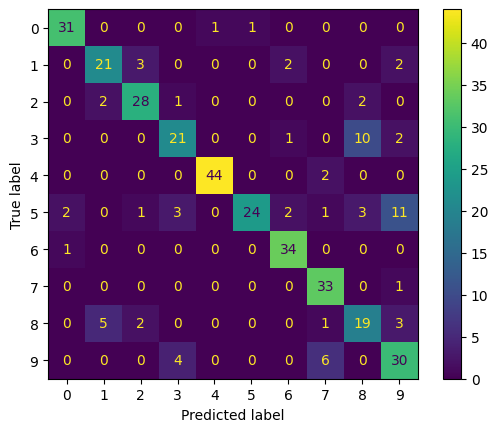

In [16]:
ConfusionMatrixDisplay(confusion_matrix=confusion).plot()
plt.show()